<a href="https://colab.research.google.com/github/seoyujiin/esaa_yb/blob/main/11%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**4. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측**

**LinearRegression 클래스 - Ordinary Least Squares**
* LinearRegression 클래스는 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스
* LinearRegreesion 클래스는 fit() 메서드로 X, y 배열을 입력받으면 회귀 계수(Coefficients)인 W를 coef_ 속성에 저장

In [ ]:
# class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

|||
|:---|:---|
|입력 파라미터|**fit_intercept**: 불린 값으로, 디폴트는 True, intercept(절편) 값을 계산할 것인지 말지를 지정함, 만일 False로 지정하면 intercept가 사용되지 않고 0으로 지정됨|
||**normalize**: 불린 값으로 디폴트는 False, fit_intercept가 False인 경우에는 이 파라미터가 무시됨, 만일 True이면 회귀를 수행하기 전에 입력 데이터 세트를 정규화함|
|속성|**coef_**: fit() 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성, Shape는 (Target 값 개수, 피처 개수)|
||**intercept_**: intercept 값|

* OLS 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받음
* 다중공선성(multi-collinearity) 문제: 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해짐
* 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용, 또한 매우 많은 피처가 다중 공선성 문제를 가지고 있다면 PCA를 통해 차원 축소를 수행하는 것도 고려해 볼 수 있음

**회귀 평가 지표**
* 회귀의 평가를 위한 지표는 실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표가 중심
* 실제값과 예측값의 차이를 그냥 더하면 +와 -가 섞여서 오류가 상쇄되므로 정확한 지표가 될 수 없음, 따라서 오류의 절댓값 평균이나 제곱, 또는 제곱한 뒤 다시 루트를 씌운 평균값을 구함

|평가 지표|설명|
|:---|:---|
|MAE|Mean Absolute Error(MAE)이며 실제 값과 예측값의 차이를 절댓값으로 변환해 평균한 것|
|MSE|Mean Squared Error(MSE)이며 실제 값과 예측값의 차이를 제곱해 평균한 것|
|RMSE|MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운 것이 RMSE(Root Mean Squared Error)|
|R²|분산 기반으로 예측 성능을 평가함, 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높음|

* 이 밖에 MSE나 RMSE에 로그를 적용한 MSLE(Mean Squared Log Error)와 RMSLE(Root Mean Squared Log Error)도 사용함

|평가 방법|사이킷런 평가 지표 API|Scoring 함수 적용 값|
|:---|:---|:---|
|MAE|metrics.mean_absolute_error|'neg_mean_absolute_error|
|MSE|metrics.mean_squared_error|'neg_mean_squared_error|
|R²|metrics.r2_score|'r2'|

* Scoring 함수에 회귀 평가 지표를 적용할 때 유의할 점: 'neg' 접두어는 Negative(음수) 값을 가진다는 의미인데, MAE는 절댓값의 합이기 때문에 음수가 될 수 없음 → score 값이 클수록 좋은 평가 결과로 자동 평가, 그러나 실제 값과 예측값의 오류 차이를 기반으로 하는 회귀 평가 지표의 경우 값이 커지면 오히려 나쁜 모델이라는 의미 → 이를 사이킷런의 Scoring 함수에 일반적으로 반영하려면 보정 필요 → 따라서 -1을 원래의 평가 지표 값에 곱해서 음수(Negative)를 만들어 작은 오류 값이 더 큰 숫자로 인식하게 함
* 'neg_mean_absolute_error'가 의미하는 것은 -1*metrics.mean_absolute_error()이니 주의 필요

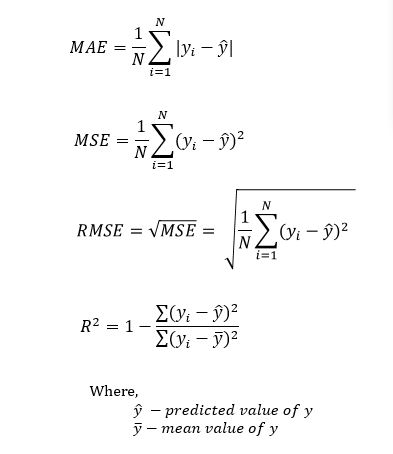

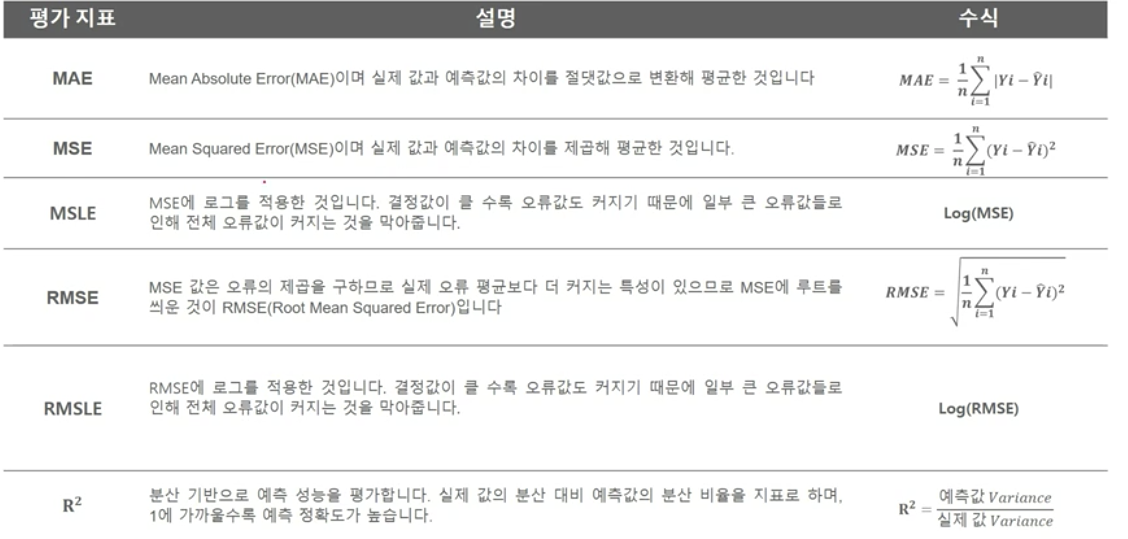

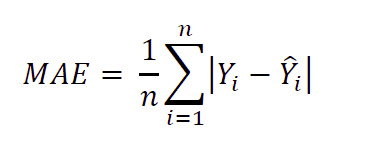

**LinearRegression을 이용해 보스턴 주택 가격 회귀 구현**
* 사이킷런에 내장된 데이터 세트인 보스턴 주택 가격 데이터 이용
* 해당 피처에 대한 설명
  + CRIM : 지역별 범죄 발생률
  + ZN : 25,000평방피트를 초과하는 거주 지역의 비율
  + INDUS : 비상업 지역 넓이 비율
  + CHAS : 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
  + NOX : 일산화질소 농도
  + RM : 거주할 수 있는 방 개수
  + AGE : 1940년 이전에 건축된 소유 주택의 비율
  + DIS : 5개 주요 고용센터까지의 가중 거리
  + RAD : 고속도로 접근 용이도
  + TAX : 10,000달러당 재산세율
  + PTRATIO : 지역의 교사와 학생 수 비율
  + B : 지역의 흑인 거주 비율
  + LSTAT : 하위 계층의 비율
  + MEDV : 본인 소유의 주택 가격(중앙값)

* 사이킷런은 보스턴 주택 가격 데이터 세트를 load_boston()을 통해 제공
* 해당 데이터 세트를 로드하고 DataFrame으로 변경

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=21, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
# from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터 세트 로드
# boston = load_boston()

# boston 데이터 세트 DataFrame으로 변환
# bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함.
# bostonDF['PRICE'] = boston.target
# print('Boston 데이터 세트 크기:', bostonDF.shape)
# bostonDF.head()

feature_names=['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX'	,'PTRATIO',	'B'	,'LSTAT',	'PRICE']
bostonDF = pd.DataFrame(boston, columns=feature_names)
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


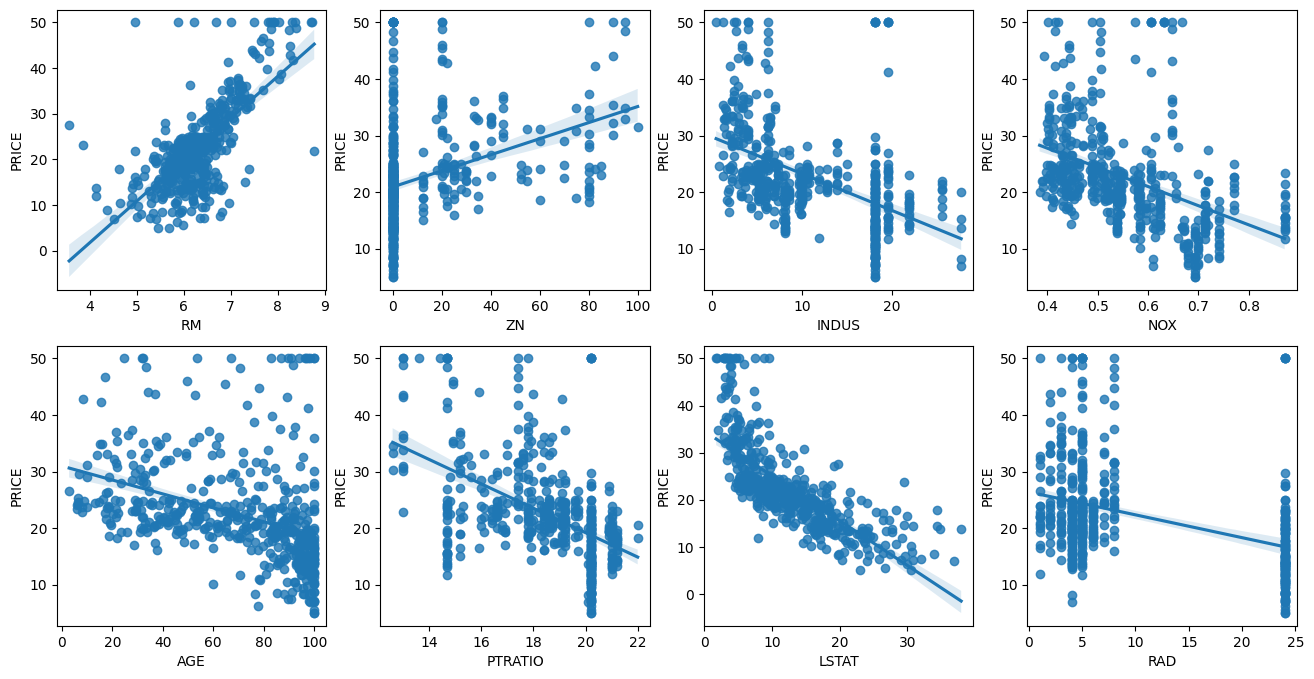

In [3]:
# 각 칼럼이 회귀 결과에 미치는 영향 시각화

# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
  # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

→ 다른 칼럼보다 RM과 LSTAT의 PRICE 영향도가 가장 두드러짐

→ RM(방 개수)은 양 방향의 선형성(Positive Linearity)이 가장 큼, 즉 방의 크기가 클수록 가격 증가, LSTAT(하위 계층의 비율)는 음 방향의 선형성(Negative Linearity)이 가장 큼

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3,
                                                    random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

In [5]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:',np.round(lr.coef_, 1))

절편 값: 40.995595172164826
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [6]:
# coef_ 속성은 회귀 계수 값만 가지고 있으므로 이를 피처별 회귀 계수 값으로 다시 매핑하고, 높은 값 순으로 출력

# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

→ RM이 양의 값으로 회귀 계수 가장 크며 NOX 피처의 회귀 계수 - 값이 너무 커 보임 → 차츰 최적화 수행하면서 피처coefficients의 변화 살펴보기

In [7]:
# 5개의 폴드 세트에서 cross_val_score()를 이용해 교차검증으로 MSE와 RMSE 측정
# RMSE 제공하지 않으로 MSE 수치 결과를 RMSE로 변환해야 함

from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.829


→ 5개 폴드 세트에 대해서 교차 검증을 수행한 결과, 평균 RMSE는 약 5.83이 나옴